<a href="https://colab.research.google.com/github/JeffersonRodrigues9/Projetos-em-Machine-Learning/blob/main/Projeto02_ML_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Neste projeto de Machine Learning, o objetivo é construir um modelo de
# classificação para identificar clientes inadimplentes em uma empresa de
# empréstimo de automóveis. Vamos seguir os seguintes passos:
#
# 1. Leitura da base de dados: Carregaremos e analisaremos os dados fornecidos
#    para entender os padrões que podem ajudar na identificação dos clientes
#    inadimplentes.
#
# 2. Criação de modelo de classificação: Utilizaremos algoritmos de Machine
#    Learning para criar um modelo capaz de classificar os clientes como
#    inadimplentes ou não.
#
# 3. Validação de modelos: Avaliaremos o desempenho dos modelos criados,
#    ajustando parâmetros e técnicas para melhorar a precisão e eficiência da
#    classificação.
#
# Este projeto pode ser útil para empresas que buscam mitigar os riscos de
# inadimplência, prevendo com maior precisão quais clientes têm mais chance de
# não honrar suas dívidas.

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv('/content/emp_automovel.csv')

In [5]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [6]:
x = dados.drop('inadimplente', axis =1)
y = dados ['inadimplente']

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [9]:
print(f'Acurácio: {modelo.score(x,y)}')

Acurácio: 1.0


In [10]:
from sklearn.model_selection import train_test_split

In [12]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state=5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state =5)

In [14]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurária de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurária de validação: 0.8481839561013849


In [15]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurária de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9205865272938444
Acurária de validação: 0.9063670411985019


In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10364   115]
 [  960    42]]


In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

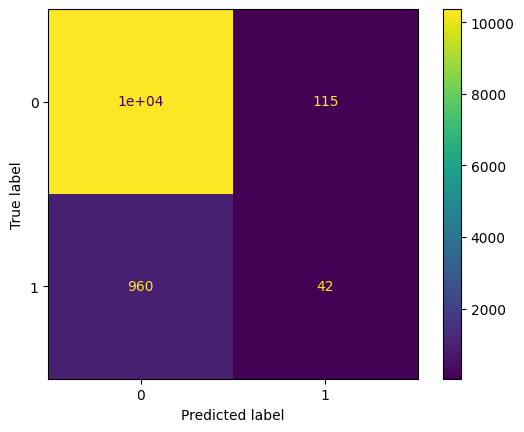

In [19]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

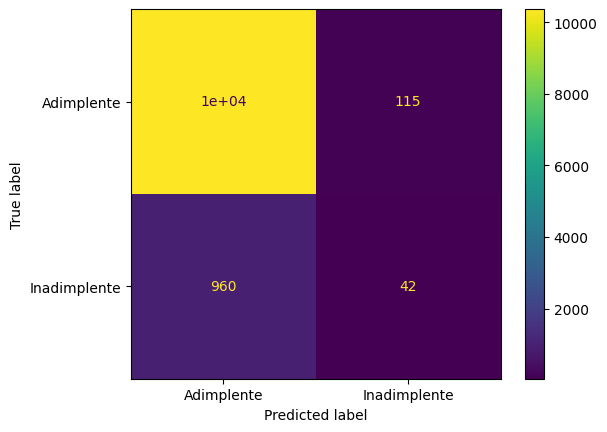

In [20]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

In [21]:
# Nessa primeira parte do projeto, foi realizado o desenvolvimento de um modelo de classificação com o objetivo de identificar clientes inadimplentes para uma empresa de empréstimos de automóveis. Inicialmente, os dados fornecidos pela empresa foram utilizados para construir o modelo, mas a avaliação do desempenho do modelo foi feita de forma inadequada, já que a validação foi realizada com os mesmos dados usados no treinamento, o que não permite avaliar a capacidade de generalização do modelo para dados novos e não vistos.
# Para corrigir isso, foi feita a separação dos dados em três partes: treinamento, validação e teste. O conjunto de treinamento foi utilizado para ajustar o modelo, o conjunto de validação foi usado para avaliar o desempenho durante o treinamento, e o conjunto de teste ficou reservado para ser utilizado apenas ao final do processo para simular a avaliação do modelo em dados reais.
# A primeira etapa de treinamento utilizou uma árvore de decisão, e para garantir que o modelo não fosse propenso ao sobreajuste (overfitting), foi ajustado o parâmetro max_depth da árvore de decisão. Esse parâmetro controla a profundidade máxima da árvore, impedindo que o modelo aprenda detalhes excessivos dos dados de treinamento, o que poderia prejudicar sua performance em dados novos.
# Após o treinamento, a acurácia foi calculada tanto para os dados de treinamento quanto para os dados de validação. Embora o modelo tenha mostrado uma acurácia de 100% nos dados de treinamento, a acurácia nos dados de validação foi significativamente mais baixa, indicando que o modelo não estava generalizando bem para dados novos.
# Para melhorar a visualização e compreensão dos resultados, foi gerada a matriz de confusão, que mostra os acertos e erros do modelo ao classificar clientes adimplentes e inadimplentes. Para facilitar a interpretação da matriz de confusão, os valores foram renomeados de 0 e 1 para "Adimplente" e "Inadimplente".
# A matriz de confusão permite observar quantos clientes que deveriam ser classificados como adimplentes ou inadimplentes foram corretamente ou incorretamente classificados, oferecendo uma visão mais detalhada do desempenho do modelo. Essa análise mais detalhada é fundamental para entender as fraquezas do modelo e identificar áreas para aprimoramento.


In [22]:
from sklearn.metrics import accuracy_score

In [24]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9063670411985019


In [25]:
from sklearn.metrics import precision_score, recall_score

In [26]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.267515923566879
Recall: 0.041916167664670656


In [27]:
from sklearn.metrics import f1_score

In [28]:
print(f'F1-score: {f1_score(y_val, y_previsto)}')

F1-score: 0.0724762726488352


In [29]:
from sklearn.metrics import RocCurveDisplay

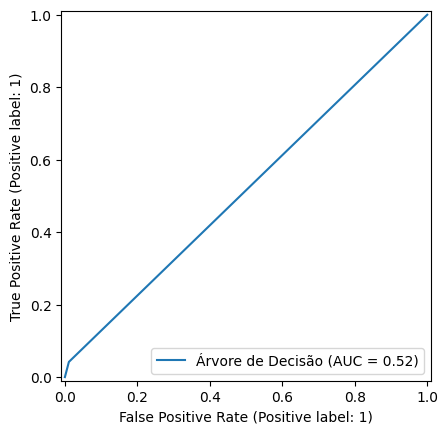

In [30]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

In [31]:
from sklearn.metrics import roc_auc_score

In [32]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5154709190265333


In [33]:
from sklearn.metrics import PrecisionRecallDisplay

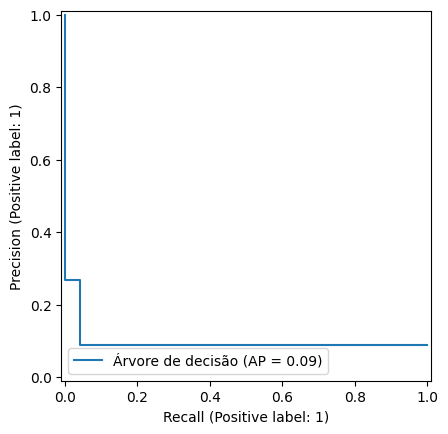

In [34]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

In [35]:
from sklearn.metrics import average_precision_score

In [36]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.09482965202560614


In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.27      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



In [39]:
# Nessa segunda etapa do projeto, exploramos as principais métricas de avaliação para modelos de classificação,
# com o foco principal no recall (recuperação), que é a métrica mais relevante para o nosso projeto de
# empréstimo de automóveis. O objetivo é minimizar ao máximo os prejuízos financeiros, identificando
# corretamente os clientes inadimplentes (classe 1) para evitar oferecer empréstimos a quem não pagará.
#
# Inicialmente, analisamos a curva ROC e a métrica AUC, que mostraram que o modelo não está conseguindo
# distinguir eficientemente entre as classes, com uma AUC de 0.52, o que indica um desempenho abaixo do esperado.
#
# Em seguida, exploramos a curva de precisão versus recall, considerando o equilíbrio entre a identificação
# correta dos clientes que pagarão (precisão) e evitar vender para os inadimplentes (recall). A métrica
# Average Precision (AP) revelou um desempenho ainda mais insatisfatório, com um valor de 0.09.
#
# Para facilitar a avaliação do desempenho do modelo, utilizamos a função `classification_report` do
# Scikit-Learn, que gera um resumo das principais métricas de avaliação, como precisão, recall, F1-score e
# acurácia. O relatório mostrou que o modelo tem um desempenho muito melhor para a classe de clientes adimplentes
# (classe 0), mas está com um desempenho muito baixo para a classe dos inadimplentes (classe 1), especialmente
# no recall, que é a métrica de maior interesse no nosso caso.